# Вероятность

Вероятность имеет 2 равносильных определения

- Частотная - вероятность это частота результата эксперимента, повторенного многократно
- Баесовская - количественная оценка нашей неуверенности/неопределенности чего либо.

In [63]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [41]:
# Частотная
np.random.seed(42)
coin_array = np.random.randint(0, 2, size=10000)
coin_frequencies = Counter(coin_array)
print(f"number of heads and tails: {coin_frequencies}")
print(f"probability of head: {coin_frequencies[0] / coin_array.shape[0]}")

number of heads and tails: Counter({0: 5013, 1: 4987})
probability of head: 0.5013


In [40]:
# Баесовская
np.random.seed(42)
coin_array = np.random.binomial(1, 0.7, size=100)
coin_frequencies = Counter(coin_array)
print(f"number of heads and tails: {coin_frequencies}")
print(f"probability of head: {coin_frequencies[0] / coin_array.shape[0]}")

number of heads and tails: Counter({1: 70, 0: 30})
probability of head: 0.3


Баесовская интерпритация позволяет генерировать данные меньших размеров

## Виды неопределенности

In [45]:
# Неопределенность механизмов генерации данных
np.random.seed(2)
left = np.random.binomial(1, 0.7, size=500)
right = np.random.binomial(1, 0.3, size=500)

coin_array = np.append(left, right)
coin_frequencies_left = Counter(coin_array[:500])
coin_frequencies_right = Counter(coin_array[500:])
coin_frequencies = Counter(coin_array)
print(f"number of heads and tails: {coin_frequencies}")
print(f"number of heads and tails: {coin_frequencies_left}")
print(f"number of heads and tails: {coin_frequencies_right}")

number of heads and tails: Counter({0: 505, 1: 495})
number of heads and tails: Counter({1: 362, 0: 138})
number of heads and tails: Counter({0: 367, 1: 133})


In [51]:
# алеаторическая неопределенность
np.random.seed(2)
coin_array = np.random.binomial(1, 0.7, size=1000)
coin_frequencies = Counter(coin_array)
print(f"number of heads and tails: {coin_frequencies}")

number of heads and tails: Counter({1: 729, 0: 271})


## Вероятность как расширение логики

### Вероятность события

Определим событие A - как некоторое бинарное событие, например будет пробка на ул. Ленина с 17:00 до 19:00 или сила тока > 3А

Тогда: P(A) - вероятность наступления события A (P - probability)

$\large{0 \le P(A) \le 1}$

- P(A) = 0 - означает что событие точно не наступит
- P(A) = 1 - означает что событие точно наступит

$\large{P(\bar{A})}$ - вероятность не наступления события A

$\large{P(\bar{A})} = 1 - P(A)$

$\large{0 \le P(\bar{A}) \le 1}$ - доказать?

### Совместная вероятность

Определим $\large {P(A \land B) = P(A, B)}$ - как вероятность одновременного наступления событий A и B - примеры?

### Вероятность объеденения событий

$\large{P (A \lor B)}$ - вероятность наступления или события A или события B

$\large{P (A \lor B) = P(A) + P(B) - P(A \land B)}$

<img src="./img/union.png">

Если события взаимоисключающие то:

$\large{P (A \lor B) = P(A) + P(B)}$ - нарисовать диаграмму

### Условная вероятность

Имея событие A - P(A)

Требуется найти вероятность $\large{P(B|A) =\frac{P(A, B)}{P(A)}}$

P(A) != 0

### Вероятность независимых событий

Событие B независимо от A если $ \large{P(B|A) = P(B)} $

Тогда $ \large{P(A, B) = P(A)P(B)}$

### Условная независимость событий

$\large {P(A, B| C) = P(A | C) P(B | C)}$

Например вероятность кашля при ОРВИ и температуры при ОРВИ 

## Случайные величины

Предположим что X представляет неизвестную величину, например число на грани игральной кости или количество свободных парковочных мест в 15:00 у какого либо здания.
Если величина X неизвеста и может изменятся, тогда X мы будем называть случайной величиной. Все возможные значения X мы будем называть выборкой, например для игральной кости
X = {1, 2, 3, 4, 5, 6}. Событием же будем называть множество исходов из выборки. Например событие четное число на игральной кости представляет собой {2, 4, 6}

### Дискретные случайные величины

Если выборка конечна или счетно бесконечна (целые числа), тогда X называется дискретной случайной величиной, в этом случае будет обозначать вероятность события x случайной величины X, как P(X=x).

Функция плотности вероятности (pmf) будет расчитываться, путем расчета вероятности X принять все возможные значения x

In [54]:
pmf = np.random.poisson(lam=2, size=(100, ))

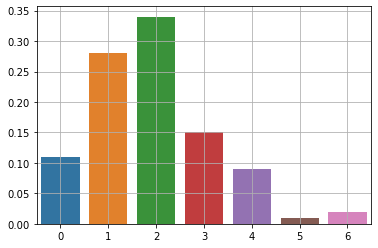

In [75]:
values, counts = np.unique(pmf, return_counts=True);
sns.barplot(x=values, y=counts / counts.sum());
plt.grid(True);